    1) Подберите скорость обучения (alpha) и количество итераций
    2) В этом коде мы избавляемся от итераций по весам, но здесь есть ошибка, исправьте её. (код в материалах к уроку)
    3) Вместо того чтобы задавать количество итераций, задайте условие остановки алгоритма, когда ошибка за итерацию начинает изменяться ниже определённого порога — упрощённый аналог параметра tol в линейной регрессии в sklearn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [2]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

In [3]:
X.shape

(10, 2)

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [5]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

    1. Подберите скорость обучения (eta) и количество итераций.
    Для удобства оставляю "дано": 

In [6]:
n = X.shape[0]

eta = 1e-2 #0.01
n_iter = 100

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if i % 10 == 0:
        eta /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 6.67106886 10.61676385], MSE = 749.71
Iteration #20: W_new = [ 9.49320908 10.25731657], MSE = 648.91
Iteration #30: W_new = [11.85740092  9.83349244], MSE = 570.46
Iteration #40: W_new = [13.86876921  9.46898661], MSE = 508.03
Iteration #50: W_new = [15.59085668  9.15672679], MSE = 457.73
Iteration #60: W_new = [17.07337653  8.88789585], MSE = 416.77
Iteration #70: W_new = [18.35601294  8.65530964], MSE = 383.06
Iteration #80: W_new = [19.47073522  8.45317196], MSE = 355.08
Iteration #90: W_new = [20.44350656  8.27677488], MSE = 331.65


In [7]:
n = X.shape[0]

eta = 0.1 # меняю старт. скорость обучения
n_iter = 115 # меняю кол-во итераций

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if i % 5 == 0: # Меняю условие уменьшения шага 
        eta /= 1.05 # Меняю скорость обучения при каждом посл. шаге
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')
        print(f'таргет = {y} предсказанное значение = {y_pred}') # добавляю на просмотр таргет и предсказание, 
        #для большего понимания тогности.

Number of objects = 10        
Learning rate = 0.1        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [11.8 38.2], MSE = 3047.75
таргет = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60] предсказанное значение = [1.5 1.5 2.  3.5 2.5 1.  3.5 6.  1.5 2. ]
Iteration #5: W_new = [ -329.76018913 -1924.91996868], MSE = 12349491.12
таргет = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60] предсказанное значение = [1002.32504975 1002.32504975 1836.47987104 4338.94433492 2670.63469233
  168.17022845 4338.94433492 8509.71844139 1002.32504975 1836.47987104]
Iteration #10: W_new = [17391.28045392 95752.24899692], MSE = 34871798746.47
таргет = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60] предсказанное значение = [ -51787.93164804  -51787.93164804  -95648.95994276 -227232.0448269
 -139509.98823747   -7926.90335333 -227232.0448269  -446537.18630046
  -51787.93164804  -95648.95994276]
Iteration #15: W_new = [ -600012.49625318 -3309054.77216856], MSE = 48101047563943.17
таргет = [45, 55, 50, 55, 60, 35, 75, 80, 5

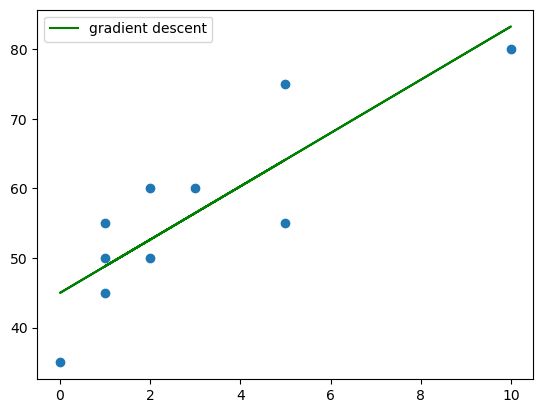

In [8]:
# График для наглядности 
y_pred_grad = X @ W
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_grad, label='gradient descent', c='g')
plt.legend()
plt.show()

Небольшой вывод: пробуя различные значения параметров, получившиеся наиболее оптимальны, другие значения дают порой разительно отличающуюся от таргета картину с большим значением ошибки. 

2*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее.


In [9]:
# Дано:
n = X.shape[0]

eta = 1e-2 
n_iter = 100

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    # ИЗМЕНЕНИЯ
    W -= eta * (1/n * 2 * np.dot(X, y_pred - y))
    # ИЗМЕНЕНИЯ
    #
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')
        

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 



ValueError: shapes (10,2) and (10,) not aligned: 2 (dim 1) != 10 (dim 0)

Ошибка возникает из за несовподения размерности, исправим это:

In [10]:
(X).shape, len(y)

((10, 2), 10)

In [11]:
(X.T).shape, len(y)

((2, 10), 10)

In [12]:
n = X.shape[0]

eta = 0.05 # меняю старт. скорость обучения
n_iter = 135 # меняю кол-во итераций

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y)) # транспонируем матрицу, тем самым избавляемся от ошибки
    if i % 5 == 0:# Меняю условие уменьшения шага 
        eta /= 1 # Меняю скорость обучения при каждом посл. шаге
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')
        print(f'таргет = {y} предсказанное значение = {y_pred}') # добавляю на просмотр таргет и предсказание, 
        #для большего понимания тогности.


Number of objects = 10        
Learning rate = 0.05        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 6.4  19.35], MSE = 3047.75
таргет = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60] предсказанное значение = [1.5 1.5 2.  3.5 2.5 1.  3.5 6.  1.5 2. ]
Iteration #5: W_new = [12.89572   7.561976], MSE = 696.44
таргет = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60] предсказанное значение = [ 24.75544  24.75544  37.28392  74.86936  49.8124   12.22696  74.86936
 137.51176  24.75544  37.28392]
Iteration #10: W_new = [19.96966932  8.87179137], MSE = 379.6
таргет = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60] предсказанное значение = [26.50238623 26.50238623 34.44611813 58.27731384 42.38985004 18.55865432
 58.27731384 97.99597336 26.50238623 34.44611813]
Iteration #15: W_new = [25.09966637  7.30805593], MSE = 250.04
таргет = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60] предсказанное значение = [ 31.95861032  31.95861032  39.71951275  63.00222004  47.48041518
  24.19770788  63.00222004 101.80673219  3

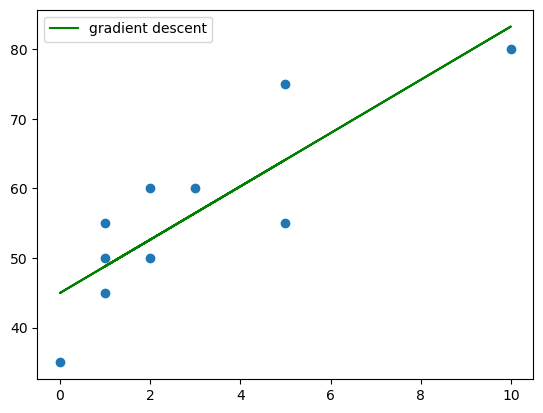

In [13]:
# График для наглядности 
y_pred_grad = X @ W
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_grad, label='gradient descent', c='g')
plt.legend()
plt.show()

3*. Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога  𝜖.

In [14]:
n = X.shape[0]

eta = 0.05 # меняем стартовую скорость обучения
epsilon = 0.001 # берем адекватно малое число для условия выхода из цикла 
iter_num = 0

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')
dist = np.inf

while dist > epsilon:
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)

    W_new = W - eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    dist = np.linalg.norm(W_new - W, ord=2)
    W = W_new.copy()
    
    if iter_num % 10 == 0:
        eta /= 1 # Меняю скорость обучения при каждом посл. шаге
        print(f'Iteration #{iter_num}: W_new = {W}, MSE = {round(err,2)}')
        print(f'таргет = {y} предсказанное значение = {y_pred}') # добавляю на просмотр таргет и предсказание, 
        #для большего понимания тогности.
    iter_num += 1

Number of objects = 10        
Learning rate = 0.05        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 6.4  19.35], MSE = 3047.75
таргет = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60] предсказанное значение = [1.5 1.5 2.  3.5 2.5 1.  3.5 6.  1.5 2. ]
Iteration #10: W_new = [19.96966932  8.87179137], MSE = 379.6
таргет = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60] предсказанное значение = [26.50238623 26.50238623 34.44611813 58.27731384 42.38985004 18.55865432
 58.27731384 97.99597336 26.50238623 34.44611813]
Iteration #20: W_new = [29.27719328  6.70531799], MSE = 172.93
таргет = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60] предсказанное значение = [35.28402183 35.28402183 42.05771048 62.37877641 48.83139912 28.51033319
 62.37877641 96.24721963 35.28402183 42.05771048]
Iteration #30: W_new = [35.16120834  5.60976141], MSE = 94.66
таргет = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60] предсказанное значение = [40.37884673 40.37884673 46.07030816 63.14469245 51.76176959 34.6873853
 63.14469245

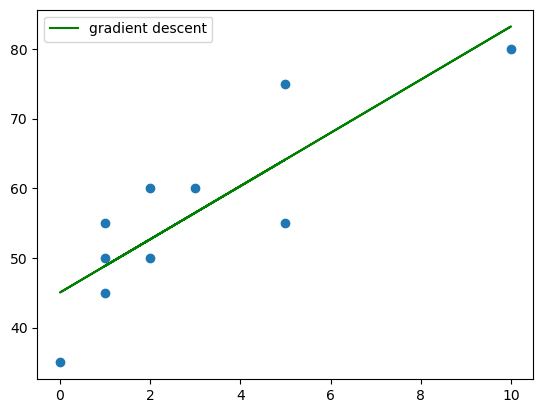

In [15]:
# График для наглядности 
y_pred_grad = X @ W
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_grad, label='gradient descent', c='g')
plt.legend()
plt.show()